In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

def custom_func(ln_x, ln_q):
    x_val = (np.exp(1.5/( ( 0.1 * ((ln_x + 7)**2) ) + 1) )/(np.log(np.exp(ln_q) + 0.007) + 5) + np.exp(-1*(ln_x+12)/5) + 1)*((np.exp(0.5*ln_q))) + 5
    return x_val

data = pd.read_csv("./custom_func_data/6-points.csv")
data_4 = pd.read_csv("./custom_func_data/4-points.csv")
data3 = pd.read_csv("./custom_func_data/linear.csv")
data['6_point_interpolator'] = data['xf']
data['4_point_interpolator'] = data_4['xf']
data['linear_interpolator'] = data3['xf']
data_edge = pd.read_csv("./custom_func_data/slope-edge.csv")
data_avg = pd.read_csv("./custom_func_data/avg_slope_inter.csv")
data_mini_spline = pd.read_csv("./custom_func_data/slope_zero.csv")
data['edge_slope_interpolator'] = data_edge['xf']
data['avg_slope_interpolator'] = data_avg['xf']
data['mini_spline_interpolator'] = data_mini_spline['xf']

data.drop('xf', axis = 1)

data['actual_function'] = custom_func(data['lnx'],data['lnq'])

data['6_point_ratio'] = data['6_point_interpolator']/data['actual_function']
data['4_point_ratio'] = data['4_point_interpolator']/data['actual_function']
data['linear_ratio'] = data['linear_interpolator']/data['actual_function']
data['edge_ratio'] = data['edge_slope_interpolator']/data['actual_function']
data['avg_ratio'] = data['avg_slope_interpolator']/data['actual_function']
data['mini_spline_ratio'] = data['mini_spline_interpolator']/data['actual_function']

graphing = [data[i:i+1800].reset_index() for i in range(0,341999,1800)]
data2 = data.sort_values(['lnx','lnq'], ascending = True, ignore_index = True)
graphing2 = [data2[i:i+190].reset_index() for i in range(0,341999,190)]

In [17]:
ratio_list = ['6_point_ratio','4_point_ratio','linear_ratio','edge_ratio','avg_ratio','a','mini_spline_ratio']
interpolator_list = ['6_point_interpolator','4_point_interpolator','linear_interpolator','edge_slope_interpolator','avg_slope_interpolator','actual_function','mini_spline_interpolator']
labels = ['6 point interpolator', '4 point interpolator', 'linear interpolator', 'edge slope interpolator', 'avg slope interpolator', 'actual function', 'mini spline interpolator']
index =1
index2 = 4

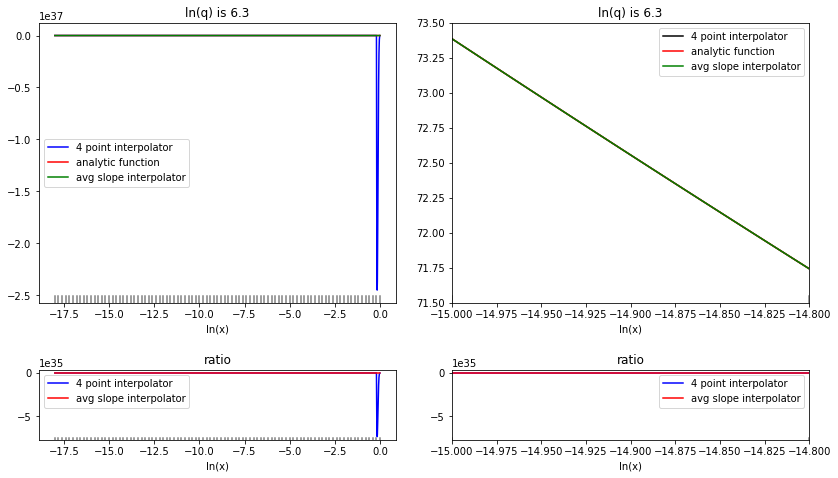

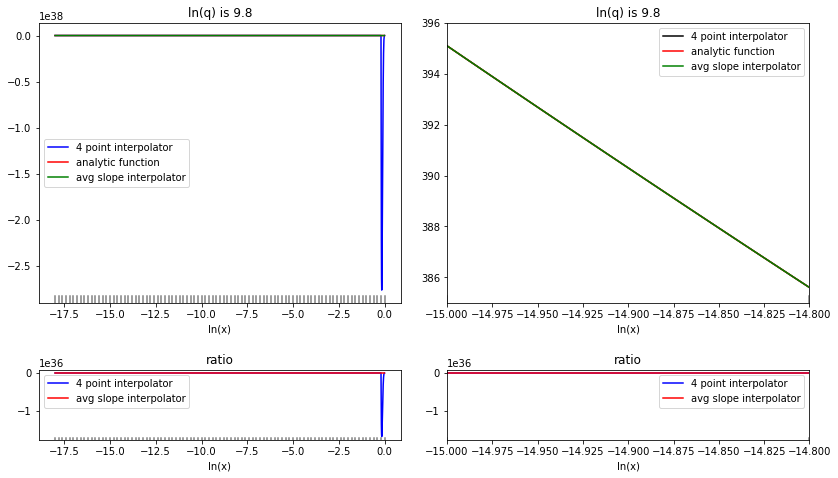

In [18]:
for dat in graphing:
    if(dat['lnq'][0]==9.8 or dat['lnq'][0]==6.3):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        axis[0,0].plot(dat['lnx'], dat[interpolator_list[index]] , color='blue',  label = labels[index])
        axis[0,0].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,0].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(x)")
        axis[0,0].set_title("ln(q) is " + str(dat['lnq'][0]))
#         print("ln(q) is " , (dat['lnq'][0]))

        i=-18
        while(i<0):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2

        axis[1,0].plot(dat['lnx'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,0].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(x)")
#         plt.xlim(-15,-14.8)
        i=-18
        while(i<0):
            axis[1,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
#         axis[1].set_ylim([0.9,1.1])

#         SECOND PART
        axis[0,1].plot(dat['lnx'], dat[interpolator_list[index]] , color='black',  label = labels[index])
        axis[0,1].plot(dat['lnx'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,1].plot(dat['lnx'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(x)")
        axis[0,1].set_title("ln(q) is " + str(dat['lnq'][0]))
        axis[0,1].set_xlim([-15,-14.8])
        if(dat['lnq'][0]==6.3):
            axis[0,1].set_ylim([71.5,73.5])
        else:
            axis[0,1].set_ylim([385,396])

        i=-18
        while(i<0):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2

        axis[1,1].plot(dat['lnx'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,1].plot(dat['lnx'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(x)")
        axis[1,1].set_xlim([-15,-14.8])
        axis[1,1].legend()
        i=-18
        while(i<0):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.2
#         axis[1,1].set_ylim([0.9,1.1])
        figure.tight_layout(pad=2.0)
        plt.show()

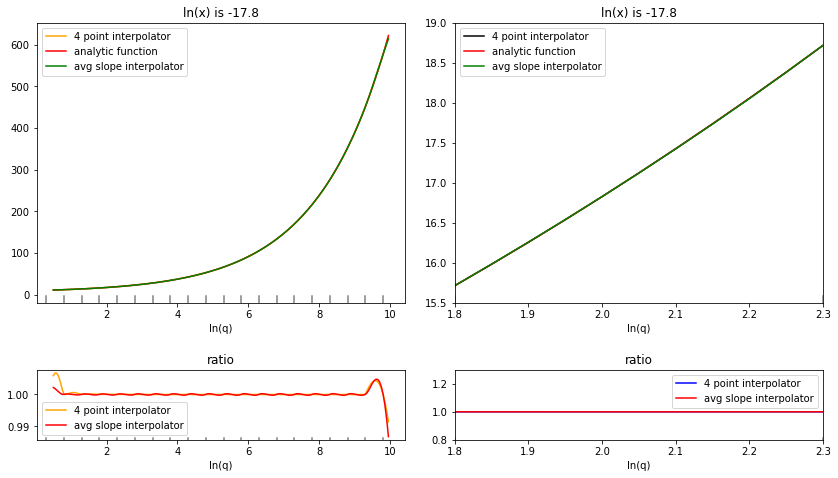

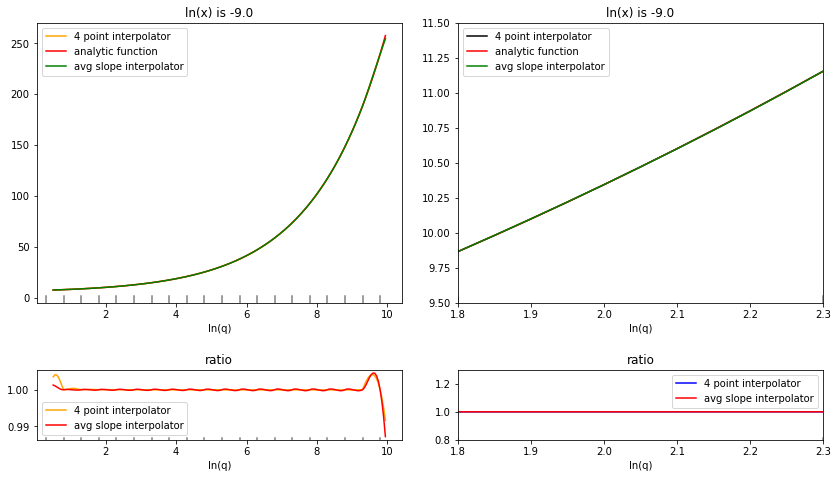

In [19]:
for dat in graphing2:
    if(dat['lnx'][0]==-17.8 or dat['lnx'][0]==-9.0):
        figure, axis = plt.subplots(2,2 , gridspec_kw={'height_ratios': [4, 1]})
        figure.set_size_inches(12, 7)
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index]] , color='orange',  label = labels[index])
        axis[0,0].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,0].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,0].legend()
        axis[0,0].set(xlabel = "ln(q)")
        axis[0,0].set_title("ln(x) is " + str(dat['lnx'][0]))
#         axis[0,0].set_ylim([-500,500])
#         print("ln(q) is " , (dat['lnq'][0]))

        i=0.3
        while(i<10):
            axis[0,0].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,0].plot(dat['lnq'], dat[ratio_list[index]] , color='orange',   label = labels[index])
        axis[1,0].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,0].legend()
        axis[1,0].set_title("ratio")
        axis[1,0].set(xlabel = "ln(q)")
#         plt.xlim(-15,-14.8)
        i=0.3
        while(i<10):
            axis[1,0].axvline(x=i,ymax =0.025,color='grey')
            i+=0.5
#         axis[1].set_ylim([0.9,1.1])

#         SECOND PART
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index]] , color='black',  label = labels[index])
        axis[0,1].plot(dat['lnq'], dat['actual_function'] , color='red',   label = 'analytic function')
        axis[0,1].plot(dat['lnq'], dat[interpolator_list[index2]] , color='green',   label = labels[index2])
        axis[0,1].legend()
        axis[0,1].set(xlabel = "ln(q)")
        axis[0,1].set_title("ln(x) is " + str(dat['lnx'][0]))
        axis[0,1].set_xlim([1.8,2.3])
        if(dat['lnx'][0]==-17.8):
            axis[0,1].set_ylim([15.5,19])
        else:
            axis[0,1].set_ylim([9.5,11.5])

        i=0.3
        while(i<10):
            axis[0,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5

        axis[1,1].plot(dat['lnq'], dat[ratio_list[index]] , color='blue',   label = labels[index])
        axis[1,1].plot(dat['lnq'], dat[ratio_list[index2]] , color='red',   label = labels[index2])
        axis[1,1].legend()
        axis[1,1].set_title("ratio")
        axis[1,1].set(xlabel = "ln(q)")
        axis[1,1].set_xlim([1.8,2.3])
        i=0.3
        while(i<10):
            axis[1,1].axvline(x=i,ymax = 0.025,color='grey')
            i+=0.5
        axis[1,1].set_ylim([0.8,1.3])
        figure.tight_layout(pad=2.0)
        plt.show()